In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
842,ham,Our Prashanthettan's mother passed away last n...,NaN,NaN,NaN
3697,ham,S:)but he had some luck.2 catches put down:),NaN,NaN,NaN
5561,ham,Get me out of this dump heap. My mom decided t...,NaN,NaN,NaN
4333,ham,Boo what time u get out? U were supposed to ta...,NaN,NaN,NaN
1679,ham,"Today is \song dedicated day..\"" Which song wi...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

**Data cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample

<bound method NDFrame.sample of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
969,ham,It wont b until 2.15 as trying 2 sort house ou...
2717,ham,Okie.. Thanx..
3320,ham,Yo im right by yo work
116,spam,You are a winner U have been specially selecte...
4400,ham,Many times we lose our best ones bcoz we are


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

,0
target,0
text,0


In [15]:
df.duplicated().sum()

403

remove duplicates

In [16]:
df.drop_duplicates(keep='first', inplace=True)

In [17]:
df.shape

(5169, 2)

# *EDA*

In [18]:
# Calculate the counts of 0 and 1 in the 'target' column
target_counts = df['target'].value_counts()

# Print the counts
print(target_counts)

# Access the individual counts
count_0 = target_counts[0]
count_1 = target_counts[1]


target
0    4516
1     653
Name: count, dtype: int64


In [19]:
import matplotlib.pyplot as plt

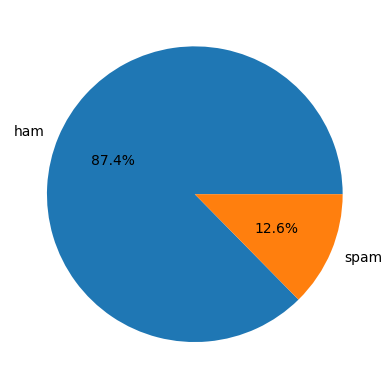

In [20]:
plt.pie(target_counts, labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

Data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
df['nums_char']=df['text'].apply(len)

In [24]:
df.head()

,target,text,nums_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import nltk

nltk.download('punkt_tab')

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,target,text,nums_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_words']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()


,target,text,nums_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [27]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,nums_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [28]:
df[['nums_char','num_words','num_sentences']].describe()

,nums_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,1.965564
std,58.236293,1.448541,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,1.000000
50%,60.000000,1.000000,1.000000
75%,117.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [29]:
#ham
df[df['target']==0][['nums_char','num_words','num_sentences']].describe()

,nums_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,1.820195
std,56.358207,1.383657,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,1.000000
50%,52.000000,1.000000,1.000000
75%,90.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [30]:
#spam
df[df['target']==1][['nums_char','num_words','num_sentences']].describe()

,nums_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,2.970904
std,30.137753,1.488425,1.488425
min,13.000000,1.000000,1.000000
25%,132.000000,2.000000,2.000000
50%,149.000000,3.000000,3.000000
75%,157.000000,4.000000,4.000000
max,224.000000,9.000000,9.000000


In [31]:
import seaborn as sns


<Axes: xlabel='nums_char', ylabel='Count'>

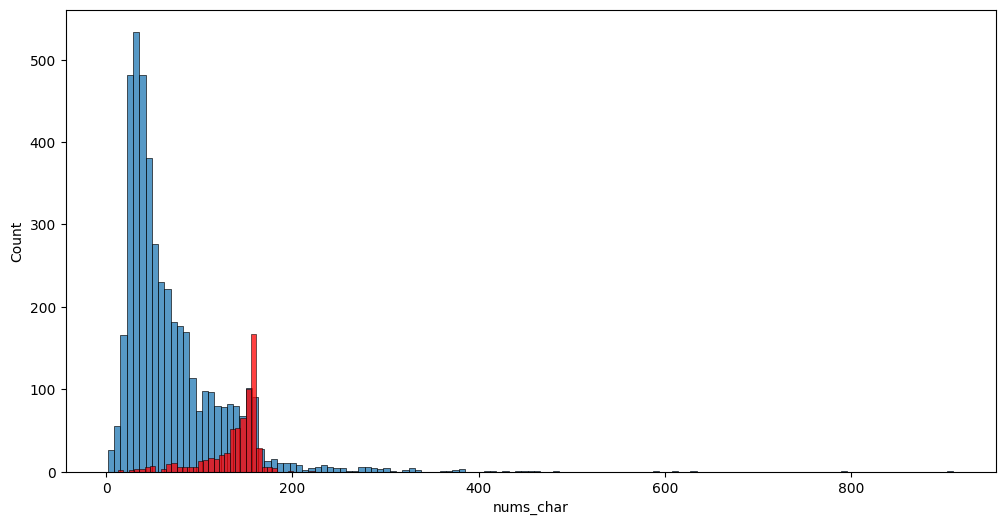

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['nums_char'])
sns.histplot(df[df['target']==1]['nums_char'],color='red')

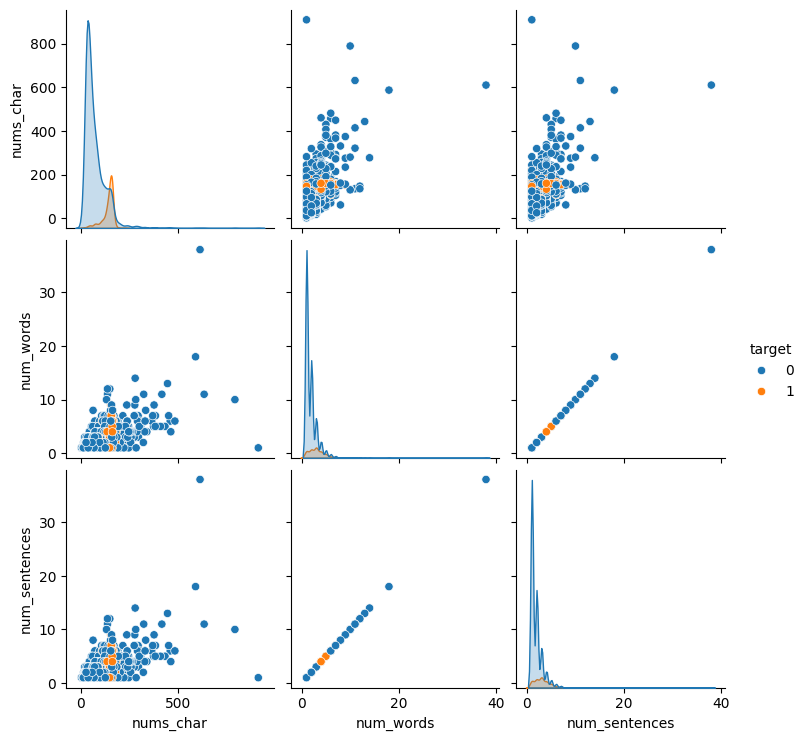

In [33]:
sns.pairplot(df,hue='target')

<Axes: >

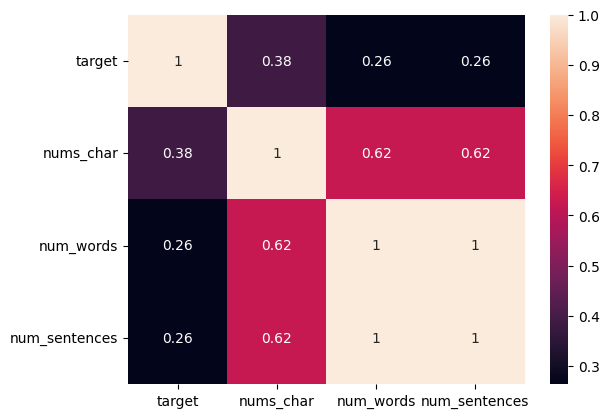

In [34]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

Data Preproccesing

*   lower case

*   tokenization
*remove special chars
*remove stop words and punctuation
*stemming


In [35]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()

def transform_text(text):
  text = text.lower()  # Call the lower() method
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():  # Remove the extra argument in isalnum()
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

df['transformed_text'] = df['text'].apply(transform_text) # Apply to a new column

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
df.head()


,target,text,nums_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [37]:
!pip install --upgrade wordcloud
from wordcloud import WordCloud

wc = WordCloud(width=50, height=50, min_font_size=10, background_color='white')

In [38]:
 span_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

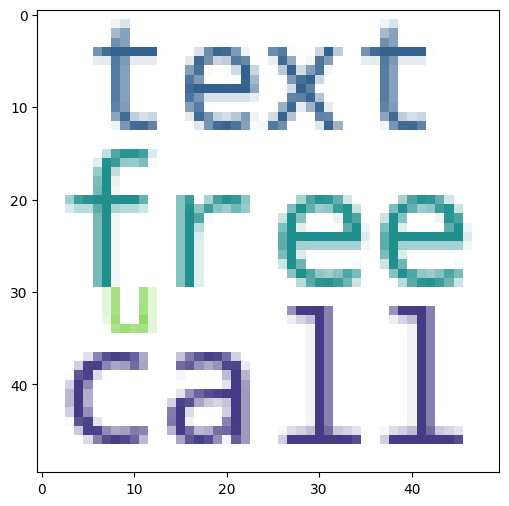

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(span_wc)

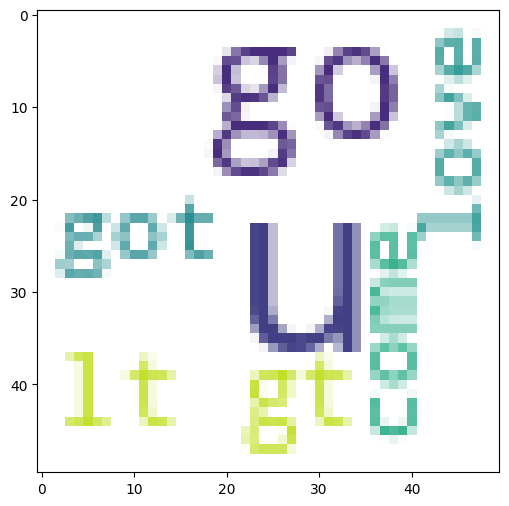

In [40]:
 ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

 plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [41]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [42]:
len(spam_corpus)

9939

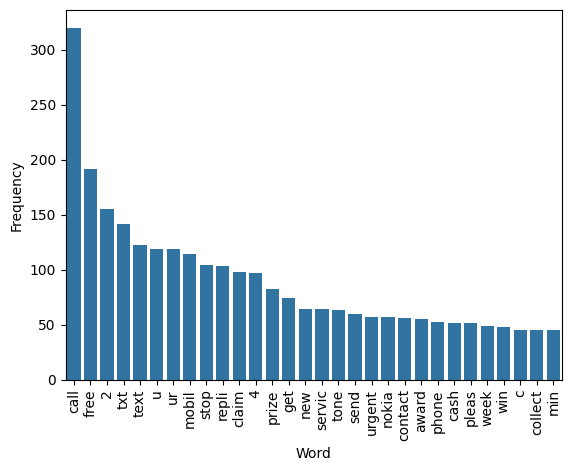

In [43]:
from collections import Counter

# Create a DataFrame from the Counter
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using named arguments
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)

plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [45]:
len(ham_corpus)

9939

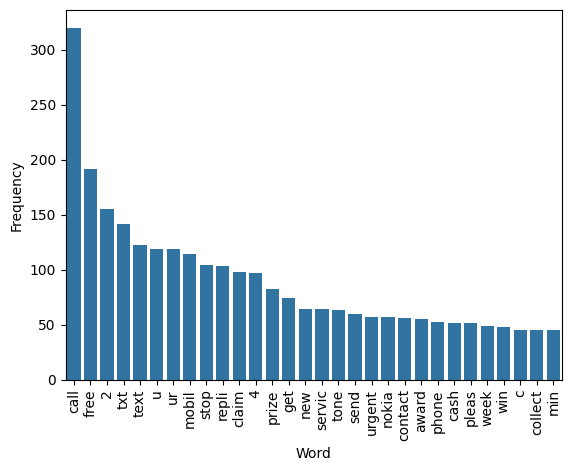

In [46]:
from collections import Counter

# Create a DataFrame from the Counter
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using named arguments
sns.barplot(x='Word', y='Frequency', data=ham_corpus_df)

plt.xticks(rotation='vertical')
plt.show()

Model Building


In [137]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()

tfidf=TfidfVectorizer(max_features=3000)



first time we used countvectorizer(bag of words) but due to low precision score we could not move forward with it because we had  low precisiio score so moving with tfidf

In [183]:
X=tfidf.fit_transform(df['transformed_text']).toarray()


In [184]:
y=df['target'].values


In [185]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [186]:
from sklearn.model_selection import train_test_split


In [187]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [188]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [189]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [190]:
mnb=mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)


print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))



0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [191]:
bnb=bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## try to it with other model and see what performs great


In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import  XGBClassifier


In [166]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,learning_rate=2)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)

In [167]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbc,
    'xgb':xgb
}







In [168]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision









In [169]:
train_classifier(svc,X_train,y_train,X_test,y_test)



(0.9758220502901354, 0.9747899159663865)

In [170]:
accuracy_scores=[]
precision_scores=[]

for names,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",names)
  print("Accuracy is ",current_accuracy)
  print("Precision is ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


For  SVC
Accuracy is  0.9758220502901354
Precision is  0.9747899159663865
For  KN
Accuracy is  0.9052224371373307
Precision is  1.0
For  NB
Accuracy is  0.9709864603481625
Precision is  1.0
For  DT
Accuracy is  0.9303675048355899
Precision is  0.8173076923076923
For  LR
Accuracy is  0.9584139264990329
Precision is  0.9702970297029703
For  RF
Accuracy is  0.9758220502901354
Precision is  0.9829059829059829
For  AdaBoost
Accuracy is  0.9245647969052224
Precision is  0.8488372093023255
For  BgC
Accuracy is  0.9584139264990329
Precision is  0.8682170542635659
For  ETC
Accuracy is  0.9748549323017408
Precision is  0.9745762711864406
For  GBDT
Accuracy is  0.9468085106382979
Precision is  0.9191919191919192
For  xgb
Accuracy is  0.913926499032882
Precision is  0.689922480620155


In [171]:
# Create the performance_df
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

In [172]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.930368,0.817308
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.924565,0.848837
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


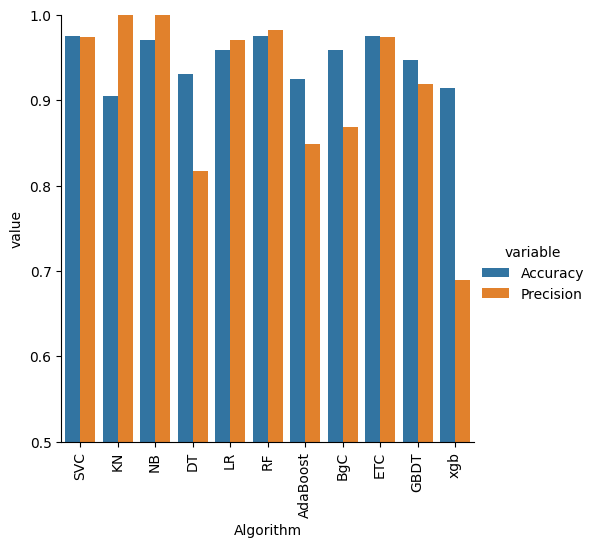

In [173]:
# Reset the DataFrame before using pd.melt
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

# Now you can safely use pd.melt
performance_df = pd.melt(performance_df, id_vars=['Algorithm'], value_vars=['Accuracy', 'Precision'], var_name='variable', value_name='value')
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df, kind='bar', height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

MOdel Improving
tdiff max feature using

# VOting CLassifier


In [174]:
from sklearn.ensemble import VotingClassifier

svc=SVC(kernel='sigmoid',gamma=1.0)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)


In [175]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='hard')


In [176]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [177]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [193]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))